
******************************************************************************

Welcome to the Multilayer Perceptron Neural Network
  trained using the backpropagation method.
Version 0.2, 01/22/2017, A.J. Maren
For comments, questions, or bug-fixes, contact: alianna.maren@northwestern.edu
 
This program learns to distinguish between five capital letters: X, M, H, A, and N
It allows users to examine the hidden weights to identify learned features

******************************************************************************

 
  The number of nodes at each level are:
    Input: 5x5 (square array)
    Hidden: 6
    Output: 5 (five classes)
[-0.757 -0.635  0.944 -0.752 -0.36   0.601]
[ 0.325  0.176  0.511 -0.033 -0.864]
 
  Before training:
 
  Data Set Number 0  for letter  X
 
 The hidden node activations are:
[0.324 0.987 0.81  0.219 0.668 0.964]
 
 The output node activations are:
[0.834 0.803 0.323 0.405 0.258]
 
 The desired output array values are: 
[1. 0. 0. 0. 0.]
 
 The error

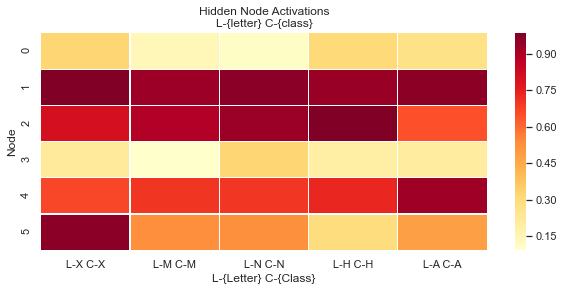

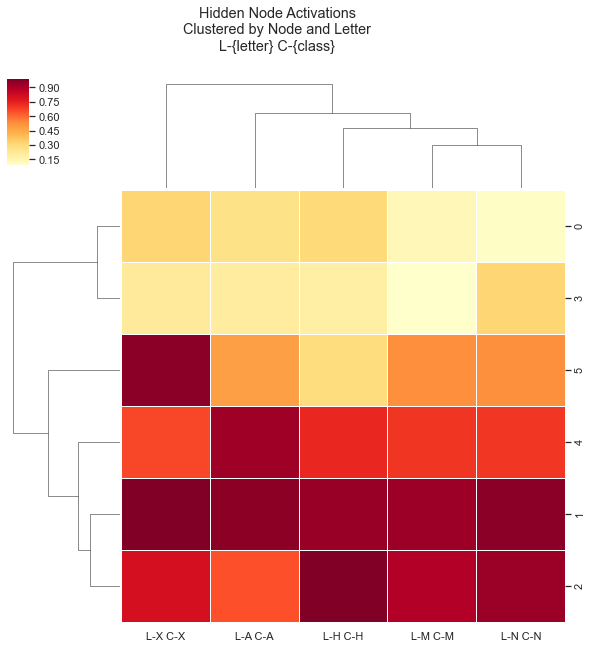

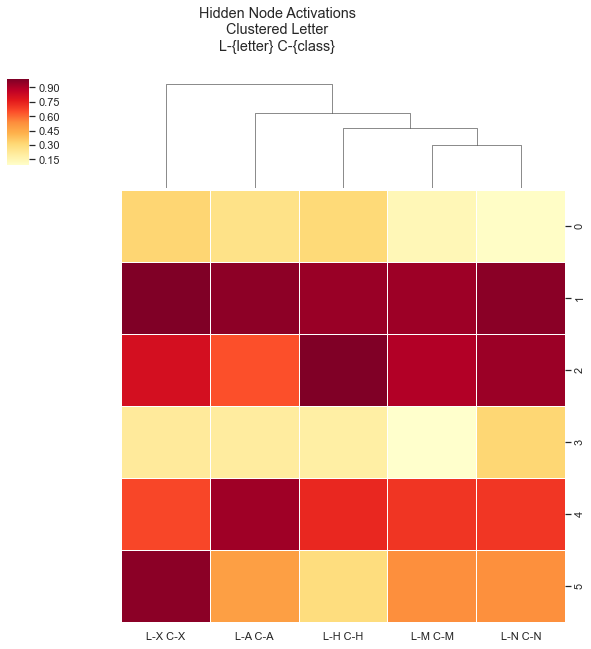

Out of while loop at iteration  479
 
  After training:
 
  Data Set Number 0  for letter  X
 
 The hidden node activations are:
[0.424 0.993 0.113 0.733 0.987 0.968]
 
 The output node activations are:
[0.883 0.133 0.07  0.063 0.098]
 
 The desired output array values are: 
[1. 0. 0. 0. 0.]
 
 The error values are:
[ 0.117 -0.133 -0.07  -0.063 -0.098]
New SSE = 0.049892
 
  Data Set Number 1  for letter  M
 
 The hidden node activations are:
[0.142 0.984 0.62  0.366 0.735 0.071]
 
 The output node activations are:
[0.114 0.279 0.226 0.261 0.127]
 
 The desired output array values are: 
[0. 1. 0. 0. 0.]
 
 The error values are:
[-0.114  0.721 -0.226 -0.261 -0.127]
New SSE = 0.667443
 
  Data Set Number 2  for letter  N
 
 The hidden node activations are:
[0.026 0.992 0.718 0.787 0.906 0.039]
 
 The output node activations are:
[0.112 0.239 0.318 0.223 0.057]
 
 The desired output array values are: 
[0. 0. 1. 0. 0.]
 
 The error values are:
[-0.112 -0.239  0.682 -0.223 -0.057]
New SSE =

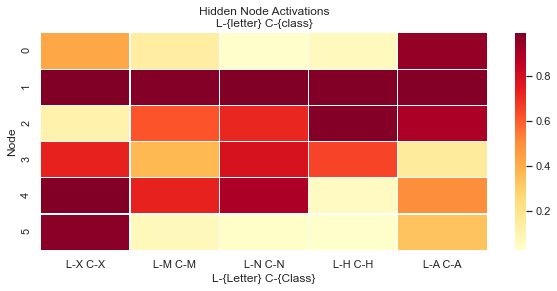

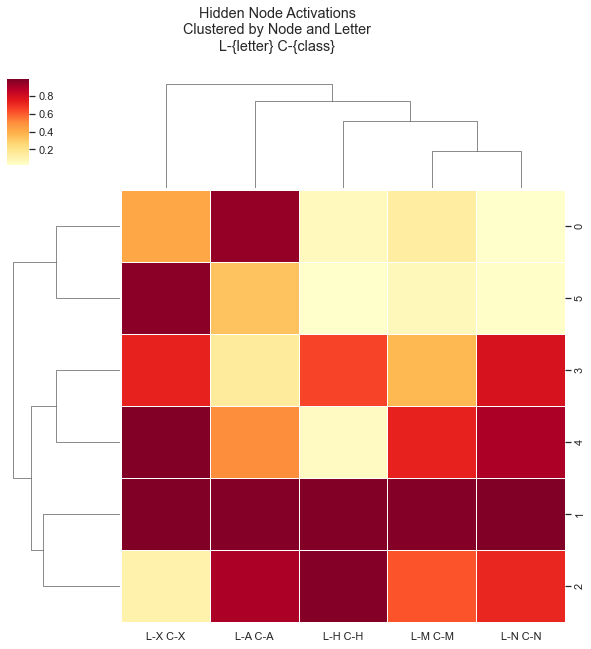

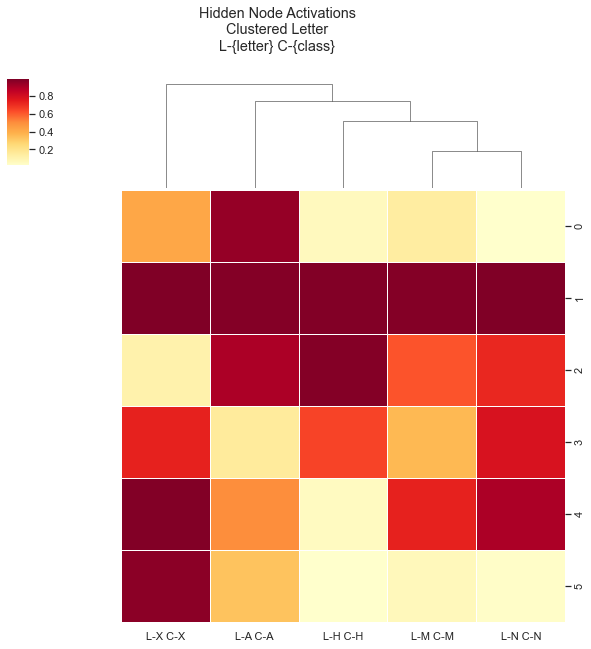

In [1]:
# -*- coding: utf-8 -*-
# We will randomly define initial values for connection weights, and also randomly select
#   which training data that we will use for a given run.

# ################################################################################################
#
#
#  5x5 Module 3
#
#
# ################################################################################################

import random

# We want to use the exp function (e to the x); it's part of our transfer function definition
from math import exp

# Biting the bullet and starting to use NumPy for arrays
import numpy as np

# So we can make a separate list from an initial one
import copy

# import packages for heatmap associated generation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

# For pretty-printing the arrays
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True) 

####################################################################################################
####################################################################################################
#
# This is a tutorial program, designed for those who are learning Python, and specifically using 
#   Python for neural networks applications
#
#
####################################################################################################
####################################################################################################


####################################################################################################
####################################################################################################
#
# Procedure to welcome the user and identify the code
#
####################################################################################################
####################################################################################################


def welcome ():


    print()
    print('******************************************************************************')
    print()
    print('Welcome to the Multilayer Perceptron Neural Network')
    print('  trained using the backpropagation method.')
    print('Version 0.2, 01/22/2017, A.J. Maren')
    print('For comments, questions, or bug-fixes, contact: alianna.maren@northwestern.edu')
    print(' ') 
    print('This program learns to distinguish between five capital letters: X, M, H, A, and N')
    print('It allows users to examine the hidden weights to identify learned features')
    print()
    print('******************************************************************************')
    print()
    return()

        

####################################################################################################
####################################################################################################
#
# A collection of worker-functions, designed to do specific small tasks
#
####################################################################################################
####################################################################################################

   
#------------------------------------------------------#    

# Compute neuron activation using sigmoid transfer function
def computeTransferFnctn(summedNeuronInput, alpha):
    activation = 1.0 / (1.0 + exp(-alpha*summedNeuronInput)) 
    return activation
  

#------------------------------------------------------# 
    
# Compute derivative of transfer function
def computeTransferFnctnDeriv(NeuronOutput, alpha):
    return alpha*NeuronOutput*(1.0 -NeuronOutput)     


#------------------------------------------------------# 
def matrixDotProduct (matrx1,matrx2):
    dotProduct = np.dot(matrx1,matrx2)
    
    return(dotProduct)    


####################################################################################################
####################################################################################################
#
# Function to obtain the neural network size specifications
#
####################################################################################################
####################################################################################################

def obtainNeuralNetworkSizeSpecs ():

# This procedure operates as a function, as it returns a single value (which really is a list of 
#    three values). It is called directly from 'main.'
#        
# This procedure allows the user to specify the size of the input (I), hidden (H), 
#    and output (O) layers.  
# These values will be stored in a list, the arraySizeList. 
# This list will be used to specify the sizes of two different weight arrays:
#   - wWeights; the Input-to-Hidden array, and
#   - vWeights; the Hidden-to-Output array. 
# However, even though we're calling this procedure, we will still hard-code the array sizes for now.   

    numInputNodes = 25
    numHiddenNodes = 6
    numOutputNodes = 5   
    print(' ')
    print('  The number of nodes at each level are:')
    print('    Input: 5x5 (square array)')
    print('    Hidden: 6')
    print('    Output: 5 (five classes)')
            
# We create a list containing the crucial SIZES for the connection weight arrays                
    arraySizeList = (numInputNodes, numHiddenNodes, numOutputNodes)
    
# We return this list to the calling procedure, 'main'.       
    return (arraySizeList)  


####################################################################################################
#
# Function to initialize a specific connection weight with a randomly-generated number between 0 & 1
#
####################################################################################################

def InitializeWeight ():

    randomNum = random.random()
    weight=1-2*randomNum
#    print weight
           
    return (weight)  



####################################################################################################
####################################################################################################
#
# Function to initialize the node-to-node connection weight arrays
#
####################################################################################################
####################################################################################################

def initializeWeightArray (weightArraySizeList):

# This procedure is also called directly from 'main.'
#        
# This procedure takes in the two parameters, the number of nodes on the bottom (of any two layers), 
#   and the number of nodes in the layer just above it. 
#   It will use these two sizes to create a weight array.
# The weights will initially be assigned random values here, and 
#   this array is passed back to the 'main' procedure. 

    
    numBottomNodes = weightArraySizeList[0]
    numUpperNodes = weightArraySizeList[1]

# Initialize the weight variables with random weights    
    weightArray = np.zeros((numUpperNodes,numBottomNodes))    # iniitalize the weight matrix with 0's
    for row in range(numUpperNodes):  #  Number of rows in weightMatrix
        # For an input-to-hidden weight matrix, the rows correspond to the number of hidden nodes
        #    and the columns correspond to the number of input nodes.
        #    This creates an HxI matrix, which can be multiplied by the input matrix (expressed as a column)
        # Similarly, for a hidden-to-output matrix, the rows correspond to the number of output nodes.
        for col in range(numBottomNodes):  # number of columns in matrix 2
            weightArray[row,col] = InitializeWeight ()
                  
    
# We return the array to the calling procedure, 'main'.       
    return (weightArray)  


####################################################################################################
####################################################################################################
#
# Function to initialize the bias weight arrays
#
####################################################################################################
####################################################################################################

def initializeBiasWeightArray (numBiasNodes):

# This procedure is also called directly from 'main.'

# Initialize the bias weight variables with random weights    
    biasWeightArray = np.zeros(numBiasNodes)    # iniitalize the weight matrix with 0's
    for node in range(numBiasNodes):  #  Number of nodes in bias weight set
        biasWeightArray[node] = InitializeWeight ()
                  
# Print the entire weights array. 
    print(biasWeightArray)
                  
    
# We return the array to the calling procedure, 'main'.       
    return (biasWeightArray)  




####################################################################################################
####################################################################################################
#
# Function to return a trainingDataList
#
####################################################################################################
####################################################################################################

def obtainSelectedAlphabetTrainingValues (trainingDataSetNum):
    
    if trainingDataSetNum == 0: trainingDataList = (1,0,0,0,1, 0,1,0,1,0, 0,0,1,0,0, 0,1,0,1,0, 1,0,0,0,1, 0,'X')
    if trainingDataSetNum == 1: trainingDataList = (1,0,0,0,1, 1,1,0,1,1, 1,0,1,0,1, 1,0,0,0,1, 1,0,0,0,1, 1,'M') 
    if trainingDataSetNum == 2: trainingDataList = (1,0,0,0,1, 1,1,0,0,1, 1,0,1,0,1, 1,0,0,1,1, 1,0,0,0,1, 2,'N') 
    if trainingDataSetNum == 3: trainingDataList = (1,0,0,0,1, 1,0,0,0,1, 1,1,1,1,1, 1,0,0,0,1, 1,0,0,0,1, 3,'H') 
    if trainingDataSetNum == 4: trainingDataList = (0,0,1,0,0, 0,1,0,1,0, 1,1,1,1,1, 1,0,0,0,1, 1,0,0,0,1, 4,'A')             
                      
    return (trainingDataList)      




####################################################################################################
####################################################################################################
#
# Function to initialize a specific connection weight with a randomly-generated number between 0 & 1
#
####################################################################################################
####################################################################################################

def obtainRandomAlphabetTrainingValues (numTrainingDataSets):

   
    # The training data list will have 11 values for the X-OR problem:
    #   - First nine valuea will be the 5x5 pixel-grid representation of the letter
    #       represented as a 1-D array (0 or 1 for each)
    #   - Tenth value will be the output class (0 .. totalClasses - 1)
    #   - Eleventh value will be the string associated with that class, e.g., 'X'
    # We are starting with five letters in the training set: X, M, N, H, and A
    # Thus there are five choices for training data, which we'll select on random basis
      
    trainingDataSetNum = random.randint(0, numTrainingDataSets)
    if trainingDataSetNum == 0: trainingDataList = (1,0,0,0,1, 0,1,0,1,0, 0,0,1,0,0, 0,1,0,1,0, 1,0,0,0,1, 0,'X')
    if trainingDataSetNum == 1: trainingDataList = (1,0,0,0,1, 1,1,0,1,1, 1,0,1,0,1, 1,0,0,0,1, 1,0,0,0,1, 1,'M') 
    if trainingDataSetNum == 2: trainingDataList = (1,0,0,0,1, 1,1,0,0,1, 1,0,1,0,1, 1,0,0,1,1, 1,0,0,0,1, 2,'N') 
    if trainingDataSetNum == 3: trainingDataList = (1,0,0,0,1, 1,0,0,0,1, 1,1,1,1,1, 1,0,0,0,1, 1,0,0,0,1, 3,'H') 
    if trainingDataSetNum == 4: trainingDataList = (0,0,1,0,0, 0,1,0,1,0, 1,1,1,1,1, 1,0,0,0,1, 1,0,0,0,1, 4,'A')             
                      
    return (trainingDataList)  

            
####################################################################################################
####################################################################################################
#
# Perform a single feedforward pass
#
####################################################################################################
####################################################################################################



####################################################################################################
#
# Function to initialize a specific connection weight with a randomly-generated number between 0 & 1
#
####################################################################################################


def ComputeSingleFeedforwardPassFirstStep (alpha, arraySizeList, inputDataList, wWeightArray, 
biasHiddenWeightArray):

    inputArrayLength = arraySizeList [0]
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]
    
# iniitalize the sum of inputs into the hidden array with 0's  
    sumIntoHiddenArray = np.zeros(hiddenArrayLength)    
    hiddenArray = np.zeros(hiddenArrayLength)   

    sumIntoHiddenArray = matrixDotProduct (wWeightArray,inputDataList)
    
    for node in range(hiddenArrayLength):  #  Number of hidden nodes
        hiddenNodeSumInput=sumIntoHiddenArray[node]+biasHiddenWeightArray[node]
        hiddenArray[node] = computeTransferFnctn(hiddenNodeSumInput, alpha)

#    print ' '
#    print 'Back in ComputeSingleFeedforwardPass'
#    print 'The activations for the hidden nodes are:'
#    print '  Hidden0 = %.4f' % hiddenActivation0, 'Hidden1 = %.4f' % hiddenActivation1

                                                                                                    
    return (hiddenArray);
  


####################################################################################################
#
# Function to compute the output node activations, given the hidden node activations, the hidden-to
#   output connection weights, and the output bias weights.
# Function returns the array of output node activations.
#
####################################################################################################

def ComputeSingleFeedforwardPassSecondStep (alpha, arraySizeList, hiddenArray, vWeightArray, 
biasOutputWeightArray):

    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]
    
# iniitalize the sum of inputs into the hidden array with 0's  
    sumIntoOutputArray = np.zeros(hiddenArrayLength)    
    outputArray = np.zeros(outputArrayLength)   

    sumIntoOutputArray = matrixDotProduct (vWeightArray,hiddenArray)
    
    for node in range(outputArrayLength):  #  Number of hidden nodes
        outputNodeSumInput=sumIntoOutputArray[node]+biasOutputWeightArray[node]
        outputArray[node] = computeTransferFnctn(outputNodeSumInput, alpha)
                                                                                                   
    return (outputArray);
  


####################################################################################################
#
# Procedure to compute the output node activations and determine errors across the entire training
#  data set, and print results.
#
####################################################################################################

def ComputeOutputsAcrossAllTrainingData (alpha, arraySizeList, numTrainingDataSets, wWeightArray, 
biasHiddenWeightArray, vWeightArray, biasOutputWeightArray):

    selectedTrainingDataSet = 0
    inputArrayLength = arraySizeList [0]
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]                               

    # HM
    hiddenNodeActivationsList = []
    outputNodeActivationsList = []
                              

    while selectedTrainingDataSet < numTrainingDataSets + 1: 
        trainingDataList = obtainSelectedAlphabetTrainingValues (selectedTrainingDataSet)
        
        inputDataList = [] 
        for node in range(inputArrayLength): 
            trainingData = trainingDataList[node]  
            inputDataList.append(trainingData)

        
        letterNum = trainingDataList[25]
        letterChar = trainingDataList[26]  
        
        print(' ')
        print('  Data Set Number', selectedTrainingDataSet, ' for letter ', trainingDataList[26] )

        hiddenArray = ComputeSingleFeedforwardPassFirstStep (alpha, arraySizeList, inputDataList, wWeightArray, biasHiddenWeightArray)

        print(' ')
        print(' The hidden node activations are:')
        print(hiddenArray)

        outputArray = ComputeSingleFeedforwardPassSecondStep (alpha, arraySizeList, hiddenArray, vWeightArray, biasOutputWeightArray)
    
        print(' ')
        print(' The output node activations are:')
        print(outputArray )  

        # ########################
        # code added 01/31/19
        # append activations
        # ########################
        hiddenNodeActivationsList.append([letterChar, letterNum, trainingDataList[26], '\n'.join([letterChar, trainingDataList[26]]), hiddenArray])
        outputNodeActivationsList.append([letterChar, letterNum, trainingDataList[26], '\n'.join([letterChar, trainingDataList[26]]), outputArray])
 
        desiredOutputArray = np.zeros(outputArrayLength)    # iniitalize the output array with 0's
        desiredClass = trainingDataList[25]                 # identify the desired class
        desiredOutputArray[desiredClass] = 1                # set the desired output for that class to 1
     
        print( ' ')
        print(' The desired output array values are: ')
        print(desiredOutputArray ) 
       
                        
# Determine the error between actual and desired outputs

# Initialize the error array
        errorArray = np.zeros(outputArrayLength) 
    
        newSSE = 0.0
        for node in range(outputArrayLength):  #  Number of nodes in output set (classes)
            errorArray[node] = desiredOutputArray[node] - outputArray[node]
            newSSE = newSSE + errorArray[node]*errorArray[node]        

        print(' ')
        print(' The error values are:')
        print(errorArray)
        
# Print the Summed Squared Error  
        print('New SSE = %.6f' % newSSE)
         
        selectedTrainingDataSet = selectedTrainingDataSet +1 
        

    # ##################################################################
    # code added 01/31/19
    # visualize activations from output layer in heat map
    # ##################################################################
    print("\n\nhiddenNodeActivationsList L-{letter} C-{class}")
    print("==============================================")
    print("==============================================\n")
    df = pd.DataFrame([lst[4] for lst in hiddenNodeActivationsList])
    df = df.transpose()
    df.columns = (x[3] for x in hiddenNodeActivationsList)
    df.columns = 'L-' + df.columns.str[0:1] + ' C-' + df.columns.str[2:3]
    print(df)
    
    # hidden nodes heatmap
    print("\n\n\n\n\n")
    sns.set(rc={'figure.figsize':(10.0,4.0)})
    ax = sns.heatmap(df,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white')
    ax.set_title('Hidden Node Activations\nL-{letter} C-{class}')
    ax.set_ylabel('Node')
    ax.set_xlabel('L-{Letter} C-{Class}')
    plt.show()
    
    # hidden nodes clustermap with row and column dendrogram
    print("\n\n\n\n\n")
    ax = sns.clustermap(df,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white')
    ax.fig.suptitle('Hidden Node Activations\nClustered by Node and Letter\nL-{letter} C-{class}')
    plt.show()

    # hidden nodes clustermap with column dendrogram
    print("\n\n\n\n\n")
    ax = sns.clustermap(df,cmap='YlOrRd',annot=False,linewidths=0.1,linecolor='white',row_cluster=False)
    ax.fig.suptitle('Hidden Node Activations\nClustered Letter\nL-{letter} C-{class}')
    plt.show()
 
                        


####################################################################################################
#**************************************************************************************************#
####################################################################################################
#
#   Backpropgation Section
#
####################################################################################################
#**************************************************************************************************#
####################################################################################################

   
            
####################################################################################################
####################################################################################################
#
# Backpropagate weight changes onto the hidden-to-output connection weights
#
####################################################################################################
####################################################################################################


def BackpropagateOutputToHidden (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray, vWeightArray):

# The first step here applies a backpropagation-based weight change to the hidden-to-output wts v. 
# Core equation for the first part of backpropagation: 
# d(SSE)/dv(h,o) = -alpha*Error*F(1-F)*Hidden(h)
# where:
# -- SSE = sum of squared errors, and only the error associated with a given output node counts
# -- v(h,o) is the connection weight v between the hidden node h and the output node o
# -- alpha is the scaling term within the transfer function, often set to 1
# ---- (this is included in transfFuncDeriv) 
# -- Error = Error(o) or error at the output node o; = Desired(o) - Actual(o)
# -- F = transfer function, here using the sigmoid transfer function
# -- Hidden(h) = the output of hidden node h. 

# We will DECREMENT the connection weight v by a small amount proportional to the derivative eqn
#   of the SSE w/r/t the weight v. 
# This means, since there is a minus sign in that derivative, that we will add a small amount. 
# (Decrementing is -, applied to a (-), which yields a positive.)

# For the actual derivation of this equation with MATCHING VARIABLE NAMES (easy to understand), 
#   please consult: Brain-Based Computing, by AJ Maren (under development, Jan., 2017). Chpt. X. 
#   (Meaning: exact chapter is still TBD.) 
# For the latest updates, etc., please visit: www.aliannajmaren.com


# Unpack array lengths
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]

    transferFuncDerivArray = np.zeros(outputArrayLength)    # iniitalize an array for the transfer function
      
    for node in range(outputArrayLength):  #  Number of hidden nodes
        transferFuncDerivArray[node]=computeTransferFnctnDeriv(outputArray[node], alpha)
 


# Note: the parameter 'alpha' in the transfer function shows up in the transfer function derivative
#   and so is not included explicitly in the equations for the deltas in the connection weights    
#    print ' '
#    print ' The transfer function derivative is: '
#    print transferFuncDerivArray
                        
    deltaVWtArray = np.zeros((outputArrayLength, hiddenArrayLength))  # initialize an array for the deltas
    newVWeightArray = np.zeros((outputArrayLength, hiddenArrayLength)) # initialize an array for the new hidden weights
        
    for row in range(outputArrayLength):  #  Number of rows in weightMatrix
        # For an input-to-hidden weight matrix, the rows correspond to the number of hidden nodes,
        #    and the columns correspond to the number of input nodes.
        #    This creates an HxI matrix, which can be multiplied by the input node array (expressed as a column).
        # Similarly, for a hidden-to-output matrix, the rows correspond to the number of output nodes,
        #    and the columns correspond to the number of hidden nodes,
        #    which can be multiplied by the hidden node array (expressed as a column).
        for col in range(hiddenArrayLength):  # number of columns in weightMatrix
            partialSSE_w_V_Wt = -errorArray[row]*transferFuncDerivArray[row]*hiddenArray[col]
            deltaVWtArray[row,col] = -eta*partialSSE_w_V_Wt
            newVWeightArray[row,col] = vWeightArray[row,col] + deltaVWtArray[row,col]                                                                                     

#    print ' '
#    print ' The previous hidden-to-output connection weights are: '
#    print vWeightArray
#    print ' '
#    print ' The new hidden-to-output connection weights are: '
#    print newVWeightArray

#    PrintAndTraceBackpropagateOutputToHidden (alpha, nu, errorList, actualAllNodesOutputList, 
#    transFuncDerivList, deltaVWtArray, vWeightArray, newHiddenWeightArray)    
                                                                  
                                                                                                                                                                                                            
    return (newVWeightArray);     

            
####################################################################################################
####################################################################################################
#
# Backpropagate weight changes onto the bias-to-output connection weights
#
####################################################################################################
####################################################################################################


def BackpropagateBiasOutputWeights (alpha, eta, arraySizeList, errorArray, outputArray, biasOutputWeightArray):

# The first step here applies a backpropagation-based weight change to the hidden-to-output wts v. 
# Core equation for the first part of backpropagation: 
# d(SSE)/dv(h,o) = -alpha*Error*F(1-F)*Hidden(h)
# where:
# -- SSE = sum of squared errors, and only the error associated with a given output node counts
# -- v(h,o) is the connection weight v between the hidden node h and the output node o
# -- alpha is the scaling term within the transfer function, often set to 1
# ---- (this is included in transfFuncDeriv) 
# -- Error = Error(o) or error at the output node o; = Desired(o) - Actual(o)
# -- F = transfer function, here using the sigmoid transfer function
# -- Hidden(h) = the output of hidden node h. 

# Note that the training rate parameter is assigned in main; Greek letter "eta," looks like n, 
#   scales amount of change to connection weight

# We will DECREMENT the connection weight biasOutput by a small amount proportional to the derivative eqn
#   of the SSE w/r/t the weight biasOutput(o). 
# This means, since there is a minus sign in that derivative, that we will add a small amount. 
# (Decrementing is -, applied to a (-), which yields a positive.)

# For the actual derivation of this equation with MATCHING VARIABLE NAMES (easy to understand), 
#   please consult: Brain-Based Computing, by AJ Maren (under development, Jan., 2017). Chpt. X. 
#   (Meaning: exact chapter is still TBD.) 
# For the latest updates, etc., please visit: www.aliannajmaren.com


# Note: the parameter 'alpha' in the transfer function shows up in the transfer function derivative
#   and so is not included explicitly in these equations 

# The equation for the actual dependence of the Summed Squared Error on a given bias-to-output 
#   weight biasOutput(o) is:
#   partial(SSE)/partial(biasOutput(o)) = -alpha*E(o)*F(o)*[1-F(o)]*1, as '1' is the input from the bias.
# The transfer function derivative (transFuncDeriv) returned from computeTransferFnctnDeriv is given as:
#   transFuncDeriv =  alpha*NeuronOutput*(1.0 -NeuronOutput), as with the hidden-to-output weights.
# Therefore, we can write the equation for the partial(SSE)/partial(biasOutput(o)) as
#   partial(SSE)/partial(biasOutput(o)) = E(o)*transFuncDeriv
#   The parameter alpha is included in transFuncDeriv


# Unpack the output array length
    outputArrayLength = arraySizeList [2]

    deltaBiasOutputArray = np.zeros(outputArrayLength)  # initialize an array for the deltas
    newBiasOutputWeightArray = np.zeros(outputArrayLength) # initialize an array for the new output bias weights
    transferFuncDerivArray = np.zeros(outputArrayLength)    # iniitalize an array for the transfer function
      
    for node in range(outputArrayLength):  #  Number of hidden nodes
        transferFuncDerivArray[node]=computeTransferFnctnDeriv(outputArray[node], alpha)
 

    for node in range(outputArrayLength):  #  Number of nodes in output array (same as number of output bias nodes)    
        partialSSE_w_BiasOutput = -errorArray[node]*transferFuncDerivArray[node]
        deltaBiasOutputArray[node] = -eta*partialSSE_w_BiasOutput  
        newBiasOutputWeightArray[node] =  biasOutputWeightArray[node] + deltaBiasOutputArray[node]           
   
#    print ' '
#    print ' The previous biases for the output nodes are: '
#    print biasOutputWeightArray
#    print ' '
#    print ' The new biases for the output nodes are: '
#    print newBiasOutputWeightArray
                                                                                                                                                
    return (newBiasOutputWeightArray);     


####################################################################################################
####################################################################################################
#
# Backpropagate weight changes onto the input-to-hidden connection weights
#
####################################################################################################
####################################################################################################


def BackpropagateHiddenToInput (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
    inputArray, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray):

# The first step here applies a backpropagation-based weight change to the input-to-hidden wts w. 
# Core equation for the second part of backpropagation: 
# d(SSE)/dw(i,h) = -eta*alpha*F(h)(1-F(h))*Input(i)*sum(v(h,o)*Error(o))
# where:
# -- SSE = sum of squared errors, and only the error associated with a given output node counts
# -- w(i,h) is the connection weight w between the input node i and the hidden node h
# -- v(h,o) is the connection weight v between the hidden node h and the output node o
# -- alpha is the scaling term within the transfer function, often set to 1 
# ---- (this is included in transfFuncDeriv) 
# -- Error = Error(o) or error at the output node o; = Desired(o) - Actual(o)
# -- F = transfer function, here using the sigmoid transfer function
# ---- NOTE: in this second step, the transfer function is applied to the output of the hidden node,
# ------ so that F = F(h)
# -- Hidden(h) = the output of hidden node h (used in computing the derivative of the transfer function). 
# -- Input(i) = the input at node i.

# Note that the training rate parameter is assigned in main; Greek letter "eta," looks like n, 
#   scales amount of change to connection weight

# Unpack the errorList and the vWeightArray

# We will DECREMENT the connection weight v by a small amount proportional to the derivative eqn
#   of the SSE w/r/t the weight w. 
# This means, since there is a minus sign in that derivative, that we will add a small amount. 
# (Decrementing is -, applied to a (-), which yields a positive.)

# For the actual derivation of this equation with MATCHING VARIABLE NAMES (easy to understand), 
#   please consult: Brain-Based Computing, by AJ Maren (under development, Jan., 2017). Chpt. X. 
#   (Meaning: exact chapter is still TBD.) 
# For the latest updates, etc., please visit: www.aliannajmaren.com

# Note that the training rate parameter is assigned in main; Greek letter "eta," looks like n, 
#   scales amount of change to connection weight
 
# For the second step in backpropagation (computing deltas on the input-to-hidden weights)
#   we need the transfer function derivative is applied to the output at the hidden node        

# Unpack array lengths
    inputArrayLength = arraySizeList [0]
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]              
                                          
# Note: the parameter 'alpha' in the transfer function shows up in the transfer function derivative
#   and so is not included explicitly in these equations       
    transferFuncDerivHiddenArray = np.zeros(hiddenArrayLength)    # initialize an array for the transfer function deriv 
      
    for node in range(hiddenArrayLength):  #  Number of hidden nodes
        transferFuncDerivHiddenArray[node]=computeTransferFnctnDeriv(hiddenArray[node], alpha)
        
    errorTimesTFuncDerivOutputArray = np.zeros(outputArrayLength) # initialize array
    transferFuncDerivOutputArray    = np.zeros(outputArrayLength) # initialize array
    weightedErrorArray              = np.zeros(hiddenArrayLength) # initialize array
      
    for outputNode in range(outputArrayLength):  #  Number of output nodes
        transferFuncDerivOutputArray[outputNode]=computeTransferFnctnDeriv(outputArray[outputNode], alpha)
        errorTimesTFuncDerivOutputArray[outputNode] = errorArray[outputNode]*transferFuncDerivOutputArray[outputNode]
        
    for hiddenNode in range(hiddenArrayLength):
        weightedErrorArray[hiddenNode] = 0
        for outputNode in range(outputArrayLength):  #  Number of output nodes    
            weightedErrorArray[hiddenNode] = weightedErrorArray[hiddenNode] \
            + vWeightArray[outputNode, hiddenNode]*errorTimesTFuncDerivOutputArray[outputNode]
             
    deltaWWtArray = np.zeros((hiddenArrayLength, inputArrayLength))  # initialize an array for the deltas
    newWWeightArray = np.zeros((hiddenArrayLength, inputArrayLength)) # initialize an array for the new input-to-hidden weights
        
    for row in range(hiddenArrayLength):  #  Number of rows in input-to-hidden weightMatrix
        # For an input-to-hidden weight matrix, the rows correspond to the number of hidden nodes,
        #    and the columns correspond to the number of input nodes.
        #    This creates an HxI matrix, which can be multiplied by the input node array (expressed as a column).

        for col in range(inputArrayLength):  # number of columns in weightMatrix
            partialSSE_w_W_Wts = -transferFuncDerivHiddenArray[row]*inputArray[col]*weightedErrorArray[row]
            deltaWWtArray[row,col] = -eta*partialSSE_w_W_Wts
            newWWeightArray[row,col] = wWeightArray[row,col] + deltaWWtArray[row,col]                                                                                     

#    print ' '
#    print ' The previous hidden-to-output connection weights are: '
#    print wWeightArray
#    print ' '
#    print ' The new hidden-to-output connection weights are: '
#    print newWWeightArray    
       
                                                                    
    return (newWWeightArray);     
    
            
####################################################################################################
####################################################################################################
#
# Backpropagate weight changes onto the bias-to-hidden connection weights
#
####################################################################################################
####################################################################################################


def BackpropagateBiasHiddenWeights (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
    inputArray, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray):

# The first step here applies a backpropagation-based weight change to the hidden-to-output wts v. 
# Core equation for the first part of backpropagation: 
# d(SSE)/dv(h,o) = -alpha*Error*F(1-F)*Hidden(h)
# where:
# -- SSE = sum of squared errors, and only the error associated with a given output node counts
# -- v(h,o) is the connection weight v between the hidden node h and the output node o
# -- alpha is the scaling term within the transfer function, often set to 1
# ---- (this is included in transfFuncDeriv) 
# -- Error = Error(o) or error at the output node o; = Desired(o) - Actual(o)
# -- F = transfer function, here using the sigmoid transfer function
# -- Hidden(h) = the output of hidden node h. 

# Note that the training rate parameter is assigned in main; Greek letter "eta," looks like n, 
#   scales amount of change to connection weight

# We will DECREMENT the connection weight biasOutput by a small amount proportional to the derivative eqn
#   of the SSE w/r/t the weight biasOutput(o). 
# This means, since there is a minus sign in that derivative, that we will add a small amount. 
# (Decrementing is -, applied to a (-), which yields a positive.)

# For the actual derivation of this equation with MATCHING VARIABLE NAMES (easy to understand), 
#   please consult: Brain-Based Computing, by AJ Maren (under development, Jan., 2017). Chpt. X. 
#   (Meaning: exact chapter is still TBD.) 
# For the latest updates, etc., please visit: www.aliannajmaren.com


# Unpack array lengths
    inputArrayLength = arraySizeList [0]
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]              
                                          
   
# Compute the transfer function derivatives as a function of the output nodes.
# Note: As this is being done after the call to the backpropagation on the hidden-to-output weights,
#   the transfer function derivative computed there could have been used here; the calculations are
#   being redone here only to maintain module independence              

    errorTimesTFuncDerivOutputArray = np.zeros(outputArrayLength) # initialize array    
    transferFuncDerivOutputArray    = np.zeros(outputArrayLength) # initialize array
    weightedErrorArray              = np.zeros(hiddenArrayLength) # initialize array    

    transferFuncDerivHiddenArray = np.zeros(hiddenArrayLength)  # initialize an array for the transfer function deriv 
    partialSSE_w_BiasHidden      = np.zeros(hiddenArrayLength)  # initialize an array for the partial derivative of the SSE
    deltaBiasHiddenArray         = np.zeros(hiddenArrayLength)  # initialize an array for the deltas
    newBiasHiddenWeightArray     = np.zeros(hiddenArrayLength)  # initialize an array for the new hidden bias weights
          
    for node in range(hiddenArrayLength):  #  Number of hidden nodes
        transferFuncDerivHiddenArray[node]=computeTransferFnctnDeriv(hiddenArray[node], alpha)      
                  
    for outputNode in range(outputArrayLength):  #  Number of output nodes
        transferFuncDerivOutputArray[outputNode]=computeTransferFnctnDeriv(outputArray[outputNode], alpha) 
        errorTimesTFuncDerivOutputArray[outputNode] = errorArray[outputNode]*transferFuncDerivOutputArray[outputNode]

    for hiddenNode in range(hiddenArrayLength):
        weightedErrorArray[hiddenNode] = 0
        for outputNode in range(outputArrayLength):  #  Number of output nodes    
            weightedErrorArray[hiddenNode] = (weightedErrorArray[hiddenNode] 
            + vWeightArray[outputNode, hiddenNode]*errorTimesTFuncDerivOutputArray[outputNode])
            
# Note: the parameter 'alpha' in the transfer function shows up in the transfer function derivative
#   and so is not included explicitly in these equations 


# ===>>> AJM needs to double-check these equations in the comments area
# ===>>> The code should be fine. 
# The equation for the actual dependence of the Summed Squared Error on a given bias-to-output 
#   weight biasOutput(o) is:
#   partial(SSE)/partial(biasOutput(o)) = -alpha*E(o)*F(o)*[1-F(o)]*1, as '1' is the input from the bias.
# The transfer function derivative (transFuncDeriv) returned from computeTransferFnctnDeriv is given as:
#   transFuncDeriv =  alpha*NeuronOutput*(1.0 -NeuronOutput), as with the hidden-to-output weights.
# Therefore, we can write the equation for the partial(SSE)/partial(biasOutput(o)) as
#   partial(SSE)/partial(biasOutput(o)) = E(o)*transFuncDeriv
#   The parameter alpha is included in transFuncDeriv

    for hiddenNode in range(hiddenArrayLength):  #  Number of rows in input-to-hidden weightMatrix           
        partialSSE_w_BiasHidden[hiddenNode] = -transferFuncDerivHiddenArray[hiddenNode]*weightedErrorArray[hiddenNode]
        deltaBiasHiddenArray[hiddenNode] = -eta*partialSSE_w_BiasHidden[hiddenNode]
        newBiasHiddenWeightArray[hiddenNode] = biasHiddenWeightArray[hiddenNode] + deltaBiasHiddenArray[hiddenNode]                                                                                                                                                                                                                                                         
  
                                                                                                                                            
    return (newBiasHiddenWeightArray); 
    
            
####################################################################################################
#**************************************************************************************************#
####################################################################################################
#
# The MAIN module comprising of calls to:
#   (1) Welcome
#   (2) Obtain neural network size specifications for a three-layer network consisting of:
#       - Input layer
#       - Hidden layer
#       - Output layer (all the sizes are currently hard-coded to two nodes per layer right now)
#   (3) Initialize connection weight values
#       - w: Input-to-Hidden nodes
#       - v: Hidden-to-Output nodes
#   (4) Compute a feedforward pass in two steps
#       - Randomly select a single training data set
#       - Input-to-Hidden
#       - Hidden-to-Output
#       - Compute the error array
#       - Compute the new Summed Squared Error (SSE)
#   (5) Perform a single backpropagation training pass
#
####################################################################################################
#**************************************************************************************************#
####################################################################################################


def main():

####################################################################################################
# Obtain unit array size in terms of array_length (M) and layers (N)
####################################################################################################                

# This calls the procedure 'welcome,' which just prints out a welcoming message. 
# All procedures need an argument list. 
# This procedure has a list, but it is an empty list; welcome().

    welcome()
    

# Parameter definitions, to be replaced with user inputs
    alpha = 1.0
    eta = 0.5    
    maxNumIterations = 5000    # temporarily set to 10 for testing
    epsilon = 0.05
    iteration = 0
    SSE = 0.0
    numTrainingDataSets = 4
    
# Right now, for simplicity, we're going to hard-code the numbers of layers that we have in our 
#   multilayer Perceptron (MLP) neural network. 
# We will have an input layer (I), an output layer (O), and a single hidden layer (H). 

# Define the variable arraySizeList, which is a list. It is initially an empty list. 
# Its purpose is to store the size of the array.

    arraySizeList = list() # empty list

# Obtain the actual sizes for each layer of the network       
    arraySizeList = obtainNeuralNetworkSizeSpecs ()
    
# Unpack the list; ascribe the various elements of the list to the sizes of different network layers    
    inputArrayLength = arraySizeList [0]
    hiddenArrayLength = arraySizeList [1]
    outputArrayLength = arraySizeList [2]

                           

####################################################################################################
# Initialize the weight arrays for two sets of weights; w: input-to-hidden, and v: hidden-to-output
####################################################################################################                

#
# The wWeightArray is for Input-to-Hidden
# The vWeightArray is for Hidden-to-Output

    wWeightArraySizeList = (inputArrayLength, hiddenArrayLength)
    vWeightArraySizeList = (hiddenArrayLength, outputArrayLength)
    biasHiddenWeightArraySize = hiddenArrayLength
    biasOutputWeightArraySize = outputArrayLength        

# The node-to-node connection weights are stored in a 2-D array
    wWeightArray = initializeWeightArray (wWeightArraySizeList)
    vWeightArray = initializeWeightArray (vWeightArraySizeList)

# The bias weights are stored in a 1-D array         
    biasHiddenWeightArray = initializeBiasWeightArray (biasHiddenWeightArraySize)
    biasOutputWeightArray = initializeBiasWeightArray (biasOutputWeightArraySize) 


# Notice in the very beginning of the program, we have 
#   np.set_printoptions(precision=4) (sets number of dec. places in print)
#     and 'np.set_printoptions(suppress=True)', which keeps it from printing in scientific format
#   Debug print: 
#    print
#    print 'The initial weights for this neural network are:'
#    print '       Input-to-Hidden '
#    print wWeightArray
#    print '       Hidden-to-Output'
#    print vWeightArray
#    print ' '
#    print 'The initial bias weights for this neural network are:'
#    print '        Hidden Bias = ', biasHiddenWeightArray                         
#    print '        Output Bias = ', biasOutputWeightArray
  

          
####################################################################################################
# Before we start training, get a baseline set of outputs, errors, and SSE 
####################################################################################################                
           
    trainingDataList = (0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0, ' ')                  
    print(' ')
    print('  Before training:')
    
    ComputeOutputsAcrossAllTrainingData (alpha, arraySizeList, numTrainingDataSets, wWeightArray, 
biasHiddenWeightArray, vWeightArray, biasOutputWeightArray)                           
                                             
          
####################################################################################################
# Next step - Obtain a single set of randomly-selected training values for alpha-classification 
####################################################################################################                
  
  
    while iteration < maxNumIterations:           

# Increment the iteration count
        iteration = iteration +1
    
# For any given pass, we re-initialize the training list
        trainingDataList = (0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0,0,0,0,0, 0, ' ')

        inputDataList = []                                
                                                                                          
# Randomly select one of four training sets; the inputs will be randomly assigned to 0 or 1
        trainingDataList = obtainRandomAlphabetTrainingValues (numTrainingDataSets) 


        for node in range(inputArrayLength): 
            trainingData = trainingDataList[node]  
            inputDataList.append(trainingData)
        
#        print ' '
#        print '  The input data list for letter', trainingDataList[26], ' is:'
#        print inputDataList[0], inputDataList[1], inputDataList[2], inputDataList[3], inputDataList[4]
#        print inputDataList[5], inputDataList[6], inputDataList[7], inputDataList[8], inputDataList[9]          
#        print inputDataList[10], inputDataList[11], inputDataList[12], inputDataList[13], inputDataList[14]
#        print inputDataList[15], inputDataList[16], inputDataList[17], inputDataList[18], inputDataList[19]        
#        print inputDataList[20], inputDataList[21], inputDataList[22], inputDataList[23], inputDataList[24]
#        print ' '
    

        desiredOutputArray = np.zeros(outputArrayLength)    # iniitalize the output array with 0's
        desiredClass = trainingDataList[25]                 # identify the desired class
        desiredOutputArray[desiredClass] = 1                # set the desired output for that class to 1
     
#        print ' '
#        print ' The desired output array values are: '
#        print desiredOutputArray  
#        print ' '

         
          
####################################################################################################
# Compute a single feed-forward pass and obtain the Actual Outputs
####################################################################################################                
                
                           
        hiddenArray = ComputeSingleFeedforwardPassFirstStep (alpha, arraySizeList, inputDataList, 
        wWeightArray, biasHiddenWeightArray)
    
#        print ' '
#        print ' The hidden node activations are:'
#        print hiddenArray

        outputArray = ComputeSingleFeedforwardPassSecondStep (alpha, arraySizeList, hiddenArray,
        vWeightArray, biasOutputWeightArray)
    
#        print ' '
#        print ' The output node activations are:'
 #       print outputArray    

#  Optional alternative code for later use:
#  Assign the hidden and output values to specific different variables
#    for node in range(hiddenArrayLength):    
#        actualHiddenOutput[node] = actualAllNodesOutputList [node]
    
#    for node in range(outputArrayLength):    
#        actualOutput[node] = actualAllNodesOutputList [hiddenArrayLength + node]
 
# Initialize the error array
        errorArray = np.zeros(outputArrayLength) 
    
# Determine the error between actual and desired outputs        
        newSSE = 0.0
        for node in range(outputArrayLength):  #  Number of nodes in output set (classes)
            errorArray[node] = desiredOutputArray[node] - outputArray[node]
            newSSE = newSSE + errorArray[node]*errorArray[node]        

#        print ' '
#        print ' The error values are:'
#        print errorArray   
        
# Print the Summed Squared Error  
#        print 'Initial SSE = %.6f' % newSSE
#        SSE = newSSE

         
          
####################################################################################################
# Perform backpropagation
####################################################################################################                
                

# Perform first part of the backpropagation of weight changes    
        newVWeightArray = BackpropagateOutputToHidden (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray, vWeightArray)
        newBiasOutputWeightArray = BackpropagateBiasOutputWeights (alpha, eta, arraySizeList, errorArray, outputArray, biasOutputWeightArray) 

# Perform first part of the backpropagation of weight changes       
        newWWeightArray = BackpropagateHiddenToInput (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
        inputDataList, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray)

        newBiasHiddenWeightArray = BackpropagateBiasHiddenWeights (alpha, eta, arraySizeList, errorArray, outputArray, hiddenArray,
        inputDataList, vWeightArray, wWeightArray, biasHiddenWeightArray, biasOutputWeightArray)  
    
                    
# Assign new values to the weight matrices
# Assign the old hidden-to-output weight array to be the same as what was returned from the BP weight update
        vWeightArray = newVWeightArray[:]
    
        biasOutputWeightArray = newBiasOutputWeightArray[:]
    
# Assign the old input-to-hidden weight array to be the same as what was returned from the BP weight update
        wWeightArray = newWWeightArray[:]  
    
        biasHiddenWeightArray = newBiasHiddenWeightArray[:] 
    
# Compute a forward pass, test the new SSE                                                                                
                                                                                                                                    
        hiddenArray = ComputeSingleFeedforwardPassFirstStep (alpha, arraySizeList, inputDataList, 
        wWeightArray, biasHiddenWeightArray)
    
#    print ' '
#    print ' The hidden node activations are:'
#    print hiddenArray

        outputArray = ComputeSingleFeedforwardPassSecondStep (alpha, arraySizeList, hiddenArray,
        vWeightArray, biasOutputWeightArray)
    
#    print ' '
#    print ' The output node activations are:'
#    print outputArray    

    
# Determine the error between actual and desired outputs

        newSSE = 0.0
        for node in range(outputArrayLength):  #  Number of nodes in output set (classes)
            errorArray[node] = desiredOutputArray[node] - outputArray[node]
            newSSE = newSSE + errorArray[node]*errorArray[node]        

#        print ' '
#        print ' The error values are:'
#        print errorArray   
        
# Print the Summed Squared Error  
#        print 'Previous SSE = %.6f' % SSE
#        print 'New SSE = %.6f' % newSSE 
    
#        print ' '
#        print 'Iteration number ', iteration
#        iteration = iteration + 1

        if newSSE < epsilon:

            
            break
    print('Out of while loop at iteration ', iteration)
    
####################################################################################################
# After training, get a new comparative set of outputs, errors, and SSE 
####################################################################################################                           

    print(' ')
    print('  After training:')                  
                                                      
    ComputeOutputsAcrossAllTrainingData (alpha, arraySizeList, numTrainingDataSets, wWeightArray, 
biasHiddenWeightArray, vWeightArray, biasOutputWeightArray) 

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
                                              
####################################################################################################
# Conclude specification of the MAIN procedure
####################################################################################################                
    
if __name__ == "__main__": main()

####################################################################################################
# End program
#################################################################################################### 

